In [13]:
import pandas as pd
import json

import matplotlib.pyplot as plt

In [33]:
with open('boxing.json', 'r') as json_file:
    data = json.load(json_file)

In [35]:
data = pd.json_normalize(data)

In [36]:
data.head()

,accuracy,data,experimentId,patientId,sensorId,sensorType,timestamp
0,3,"[0.94930094, 6.232107, 8.094197]",0,0,icm4x6xx Accelerometer Non-wakeup,1,204299350435606
1,3,[0],0,0,device_orient Non-wakeup,27,204167520679611
2,3,"[-1.5310919, 5.509058, 9.832388]",0,0,icm4x6xx Accelerometer Non-wakeup,1,204299310353940
3,3,"[0.19752164, 5.872977, 9.818023]",0,0,icm4x6xx Accelerometer Non-wakeup,1,204299330394773
4,3,"[1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,oplus_activity_recognition Wakeup,33171037,204203940653494


sensorId
icm4x6xx Accelerometer Non-wakeup                 916
linear_acceleration                                92
icm4x6xx Gyroscope Non-wakeup                      92
mmc56x3x Magnetometer Non-wakeup                   92
icm4x6xx Gyroscope-Uncalibrated Non-wakeup         92
Game Rotation Vector  Non-wakeup                   92
icm4x6xx Accelerometer-Uncalibrated Non-wakeup     92
Rotation Vector  Non-wakeup                        91
oplus_activity_recognition  Wakeup                  2
device_orient  Non-wakeup                           1
elevator_detect  Wakeup                             1
Name: count, dtype: int64


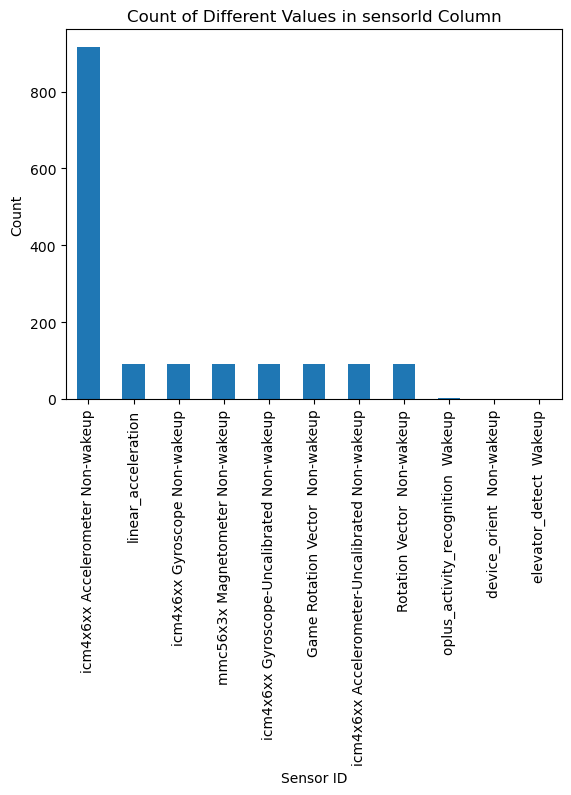

In [37]:
sensor_counts = data['sensorId'].value_counts()

# Print the sensor counts (optional)
print(sensor_counts)

# Plot the sensor counts
sensor_counts.plot(kind='bar')

# Set plot labels and title
plt.xlabel('Sensor ID')
plt.ylabel('Count')
plt.title('Count of Different Values in sensorId Column')

# Show the plot
plt.show()



In [38]:
# Filter the DataFrame for 'icm4x6xx Accelerometer Non-wakeup' in the 'sensorType' column
df = data[data['sensorId'] == 'icm4x6xx Accelerometer Non-wakeup']

df.head()

,accuracy,data,experimentId,patientId,sensorId,sensorType,timestamp
0,3,"[0.94930094, 6.232107, 8.094197]",0,0,icm4x6xx Accelerometer Non-wakeup,1,204299350435606
2,3,"[-1.5310919, 5.509058, 9.832388]",0,0,icm4x6xx Accelerometer Non-wakeup,1,204299310353940
3,3,"[0.19752164, 5.872977, 9.818023]",0,0,icm4x6xx Accelerometer Non-wakeup,1,204299330394773
7,3,"[0.37948096, 5.8107276, 9.415796]",0,0,icm4x6xx Accelerometer Non-wakeup,1,204299390517273
9,3,"[0.8391677, 5.542577, 7.241862]",0,0,icm4x6xx Accelerometer Non-wakeup,1,204299370476440


C:\Users\aiskr\AppData\Local\Temp\ipykernel_8980\2934921820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])
C:\Users\aiskr\AppData\Local\Temp\ipykernel_8980\2934921820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['x', 'y', 'z']] = pd.DataFrame(df['data'].tolist(), index=df.index)


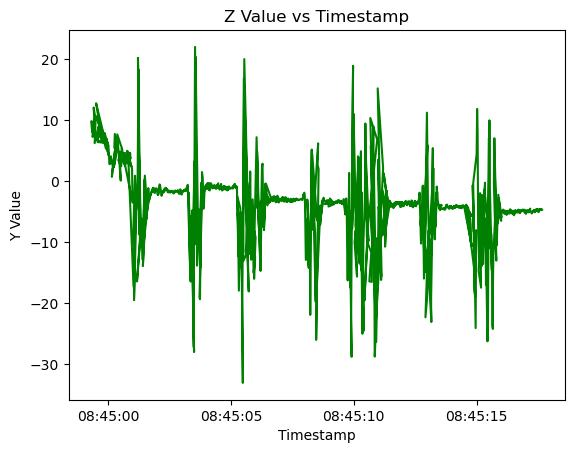

In [40]:
# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract 'x', 'y', 'z' values from the 'data' column
df[['x', 'y', 'z']] = pd.DataFrame(df['data'].tolist(), index=df.index)

# Create df_sensor with the desired columns
df_sensor = df[['timestamp', 'x', 'y', 'z']]

plt.plot(df_sensor['timestamp'], df_sensor['z'], linestyle='-', color='g')
# Set plot labels and title
plt.xlabel('Timestamp')
plt.ylabel('Y Value')
plt.title('Z Value vs Timestamp')

# Show the plot
plt.show()